# Intro to Scientific Computing

${\bf Problem \,Set\, 3}$

NAME: Brian Tong

DATE: February 8, 2016

Due date: 
${\bf Monday, Feb. 8}$

# 1) The orbit of Planet Nine

In this problem, we'll work with plotting and numerical integration. 

There's a fair amount of uncertainty regarding the orbit of Planet Nine. Let's imagine that some new calculations are done, which finds that its orbit has an eccentricity, $e=0.8$, and a semi-major axis of $a=750$ AU. What is the orbital period in years?

In [1]:
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *

ecc = 0.8 
a = 750 #AU
au = 1.49e13

p = sqrt(a**3) #orbital period in years
print p, "years"

20539.5959064 years


What are the minimum and maximum possible light-travel times from the Earth to the planet?

In [2]:
rMin = a*(1-ecc) #minimum
rMax = a*(1+ecc) #maximum
tMin = rMin/ (3E8 * 3600 / 1.5E11) #au/ (m/s*s/h / m/au)
tMax = rMax/ (3E8 * 3600 / 1.5E11)
print "The minimum possible light-travel times from the Earth to the planet:", tMin, "hours"
print "The maximum possible light-travel times from the Earth to the planet:", tMax, "hours"

The minimum possible light-travel times from the Earth to the planet: 20.8333333333 hours
The maximum possible light-travel times from the Earth to the planet: 187.5 hours


Generate a plot of Planet Nine's orbit that plots its $(x,y)$ position at 120 equally spaced intervals in time using points (not a line). 

Make sure that the aspect ratio of the plot is 1:1, so that the orbit is displayed with its correct shape. 

Place a "plus" sign at the Sun's location, and draw a 1AU circle indicating the size of Earth's orbit.

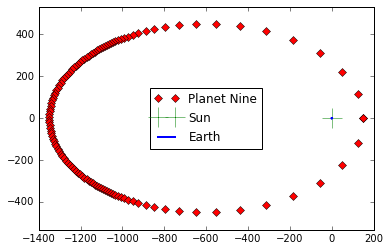

In [3]:
def r(f, a, ecc):
    return(a*(1-ecc**2)/(1+ecc*cos(f)))
def fE(E,M,ecc):
    return(E-ecc*sin(E)-M)
def fprimeE(E,ecc):
    return(1-ecc*cos(E))

M=arange(0,2*pi+2*pi/119,2*pi/119.)

E0=M
E1=E0-fE(E0,M,ecc)/fprimeE(E0,ecc)
        
#plot the orbit at 120 evenly spaced intervals in time
f=2*arctan(sqrt((1+ecc)/(1-ecc))*tan(E1/2))
xn=r(f,a * au,ecc)*cos(f)
yn=r(f,a* au,ecc)*sin(f)
plot(xn/au,yn/au, 'rD')

#sun 
plot(0, 0,"g+", ms = 20)

#earth
earthx = r(f,1,0.0167)*cos(f)
earthy = r(f,1,0.0167)*sin(f)
plot(earthx, earthy, 'b', lw =2)

axis('equal')

legend(['Planet Nine', 'Sun', 'Earth'], loc= 10)
show()

Write your own version of the Runge-Kutta Fourth-order integration technique discussed in class. Use 120 equally spaced time steps. Impliment this by writing a "for" loop that advances your solution one time step at a time.  

Next, plot the numerical integration of the planet's orbit using a thin line ON TOP of your previous plot. You can do this by pasting the code to create your previous plot here, then adding a new call to "plot()" below your other one.

Comment on how well this numerically integrated version agrees with the Kepler's equation orbit you've plotted above.

Note: feel free to break this cell up into a few if you need more space!

In [38]:
G = 6.67e-8
mSun = 1.989e33

#find velocity and accleration 
def derivs(rv):
    x = rv[0]
    y = rv[1]
    vx = rv[2]
    vy = rv[3]
    
    #set v and a
    r = sqrt(x**2 + y**2)
    dxdt = vx
    dydt = vy
    dvxdt = - (G*mSun / r**3) * x
    dvydt = - (G*mSun / r**3) * y
    
    # return v and a
    return( array([dxdt, dydt, dvxdt, dvydt]) )
dt= p*3.15E7 / 119  
t=arange(0, p*3.15E7 , dt)

# initial condition
vy0 = sqrt(G*mSun/(a*au) *(1+ecc)/(1-ecc))
iCon = array( [rMin*au,   # x
              0 ,   # y
              0 ,   # v_x
              vy0])  # v_y

x = [] 
y = []

#rk4 
for i in t: 
    k1 = derivs(iCon)
    k2 = derivs(iCon + k1 *(dt/2.))
    k3 = derivs(iCon + k2 *(dt/2.0))
    k4 = derivs(iCon + k3 *(dt))
    xv = iCon + dt/6.0*(k1 + 2*k2 +2*k3 + k4)
    
    x.append(iCon[0])
    y.append(iCon[1])
    iCon=xv

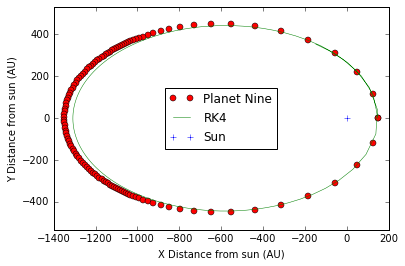

In [56]:
#plot everything in the same units
plot(xn/au, yn/au, "ro") #planet nine
plot([i/au for i in x],[i/au for i in y], 'g', lw= .5) #rk4
plot(0,0,'+') #sun
xlabel('X Distance from sun (AU)')  
ylabel('Y Distance from sun (AU)')
axis('equal')
legend(['Planet Nine', 'RK4', 'Sun'], loc= 10)
show()
#The Runge-Kutta Fourth-order agrees with Kepler's equation of orbit around the perihelion. 
#However, the RK4 is does not exact with Kepler's around the aphelion

Assign the degree of energy conservation $\Delta E=E(t)-E_0/E(t)$ to a color scale, and plot the orbit with 120 points, colored by their $\Delta E$'s. Include a colorbar to read these values.

To do this, create an array $E(t)$ that includes the kinetic and potential energy of the planet-star system. Then create an array $\Delta E$ which compares to the zero-th element of $E(t)$, $E_0$ in the equation above, or in code, something like: <code>E_integrated[0]</code>.  

<pre><code>
scatter(x_integrated, y_integrated, c=DeltaE_integrated) 
colorbar()
</pre></code>

This code sets the color based on $\Delta E$, which we've called <code>DeltaE_integrated</code> in the example above. 

In [42]:
from scipy.integrate import odeint 

x_1= rMin*au   # x1
y_1= 0  # y1
vx_1 = 0  # v_x1
vy_1 = sqrt(G*mSun/(a*au) *(1+ecc)/(1-ecc)) # v_y1
x_2 = rMax*au  # x2
y_2 = 0  # y2/
vx_2 = 0 # v_x2
vy_2 = sqrt(G*mSun/(a*au) *(1+ecc)/(1-ecc))  # v_y2

ic = array([x_1, y_1, vx_1, vy_1, x_2, y_2, vx_2, vy_2])    

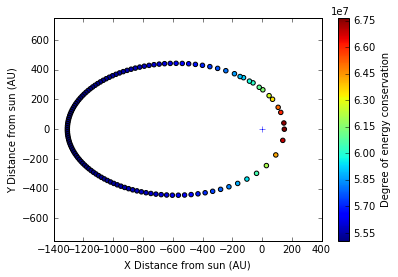

In [55]:
# E/M = 1/2*m1*v1^2/M + 1/2*m2*v2^2/M - G*m1/r1 - G*m2/r2 -G*m2*m1/(M*r21)
def Energy(x,x1,y):
    r1 = sqrt(x[0]**2 + x[1]**2)
    r2 = sqrt(x[4]**2 + x[5]**2)
    r21 = sqrt((x[4] - x[0])**2 + (x[5] - x[1])**2)
    v1sq = (x[2]**2 + x[3]**2)
   
    r = sqrt(x1[i]**2+y[i]**2)
    temp = sqrt(G*mSun/(a*r) *(1+ecc)/(1-ecc))
    v2sq = (x[6]**2 + temp**2)
    return (0.5*0.001*v1sq) + (0.5*0.04*v2sq) - (0.001*G/r1) - (0.04*G/r2) - ((0.001*0.04*G)/r21)

DeltaE_integrated = []
for i in range(len(t)):
    DeltaE_integrated.append(Energy(ic,x,y))

# plot
plot(0,0,'+')
scatter([i/au for i in x],[i/au for i in y], c= DeltaE_integrated)
colorbar(label=r'Degree of energy conservation')
xlabel('X Distance from sun (AU)')  
ylabel('Y Distance from sun (AU)')
axis('equal')
show()